**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN4a**<br>
**Name: "testing_dtree_regress.ipynb"**<br>

**Description:**<br> 
**Training and testing the `DecisionTreeRegressor` algorithm:**<br>
**1. Performing grid search to determine the best hyperparameters**<br>
**2. Performing cross validation to optimize the model for future foreign data**<br>
**3. Assessing the accuracy of the best model using different scorers and metrics**


**Abbrevations:**<br>
**1. NS -> Neutron Star**<br>
**2. QS -> Quark Star**<br>
**3. ML -> Machine Learning**

In [1]:
# Importing useful modules
import joblib
from data_analysis_ES_ML import *

In [ ]:
# Defining the grid of hyperparameters value for the 'DecisionTree' regressor
dtree_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

# 1. Neutron Stars

## **1.1 Using 8 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [3]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'16.75"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.0030219332319353616



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.18489239, 0.34651785, 0.54016444, ..., 1.        , 1.        ,
        1.        ],
       [0.06781328, 0.17954926, 0.26993915, ..., 0.70174103, 0.96482733,
        0.99499101],
       [0.08131736, 0.15359164, 0.22627936, ..., 0.62377383, 0.90679132,
        0.99120737],
       ...,
       [0.18489239, 0.34651785, 0.54016444, ..., 1.        , 1.        ,
        1.        ],
       [0.0542293 , 0.09076015, 0.16591971, ..., 0.37916421, 0.55325162,
        0.76829031],
       [0.16211385, 0.12565997, 0.2405902 , ..., 0.65535108, 0.9191936 ,
        0.99668994]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00044306 0.00111779 0.00189341 0.00194407 0.00159352 0.00222458
 0.00359397 0.00357046]
Uniform average
0.002047608573579075
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00053644 0.00152612 0.00302312 0.00348132 0.0031628  0.00586313
 0.01057702 0.01027976]
Uniform average
0.004806213406905376



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
--------------------------------------------------------------------------------------------

array([[0.14248487, 0.21188858, 0.31776542, ..., 0.9426127 , 0.99706141,
        1.        ],
       [0.04810309, 0.10727005, 0.16761407, ..., 0.40203659, 0.59759608,
        0.83709767],
       [0.07500025, 0.11179343, 0.14636534, ..., 0.3940539 , 0.5596171 ,
        0.75460657],
       ...,
       [0.08313196, 0.15757649, 0.22962824, ..., 0.62835617, 0.91302505,
        0.9915595 ],
       [0.12178054, 0.19178657, 0.22746208, ..., 0.67077058, 0.93140007,
        0.99357797],
       [0.1374744 , 0.23844002, 0.3710379 , ..., 0.65045692, 0.85913805,
        1.        ]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00049302 0.001288   0.00231423 0.00237218 0.00209809 0.0033475
 0.0056901  0.00658488]
Uniform average
0.0030235000201259956
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00059831 0.0017703  0.00372877 0.00427636 0.00420521 0.00876378
 0.01630757 0.01874687]
Uniform average
0.007299646013210043



>Learning curve


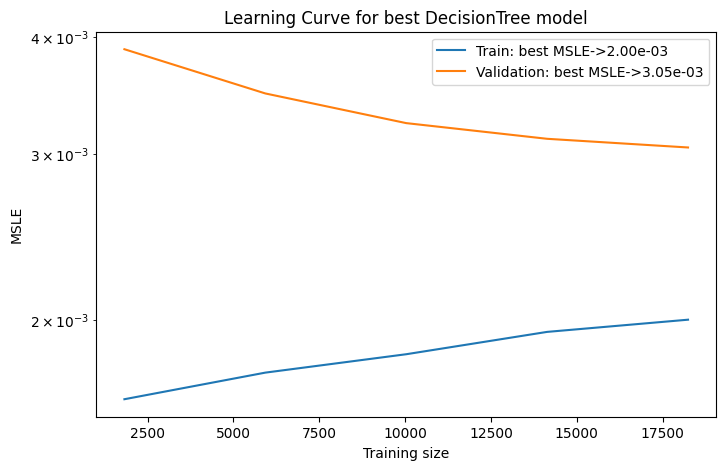




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_dpde_16X.pkl" file !!!


In [4]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_dpde_16X")

#### ->Using rowwise-shuffled data

In [5]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'15.76"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.0050782665357206125



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.18506908, 0.3468085 , 0.54064771, ..., 1.        , 1.        ,
        1.        ],
       [0.05612613, 0.20479374, 0.32899443, ..., 0.67699703, 0.96043332,
        1.        ],
       [0.06460344, 0.11862813, 0.20523079, ..., 0.53260348, 0.78576976,
        0.95935889],
       ...,
       [0.18506908, 0.33515597, 0.5197442 , ..., 0.99164293, 0.99890168,
        1.        ],
       [0.05416948, 0.10525734, 0.18041684, ..., 0.42510747, 0.62693734,
        0.85024797],
       [0.11981199, 0.18588098, 0.25740082, ..., 0.49404813, 0.6653359 ,
        0.78714494]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00064566 0.00172774 0.00313302 0.00332724 0.0036486  0.00518527
 0.00803697 0.00833785]
Uniform average
0.0042552947359718145
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00078612 0.00237277 0.00503529 0.00601798 0.0071903  0.01314981
 0.02266279 0.02409628]
Uniform average
0.010163916915760109



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------

array([[0.13586112, 0.20865315, 0.3563652 , ..., 0.75487432, 0.92565775,
        0.94773286],
       [0.05416948, 0.10525734, 0.18041684, ..., 0.42510747, 0.62693734,
        0.85024797],
       [0.08181478, 0.14853169, 0.20258316, ..., 0.38911359, 0.52794636,
        0.67132453],
       ...,
       [0.06642909, 0.11324681, 0.19507102, ..., 0.54773714, 0.81344417,
        0.98262555],
       [0.10770796, 0.18315849, 0.26548951, ..., 0.65488004, 0.88971702,
        0.9600234 ],
       [0.12585151, 0.19415282, 0.31268348, ..., 0.67364032, 0.88275837,
        0.94856831]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00070156 0.00184024 0.00346595 0.00357895 0.0042274  0.00642323
 0.00978885 0.00996828]
Uniform average
0.004999308366320311
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00085394 0.00254723 0.00562368 0.00655561 0.0086185  0.01667989
 0.02777064 0.02877798]
Uniform average
0.012178433172389631



>Learning curve


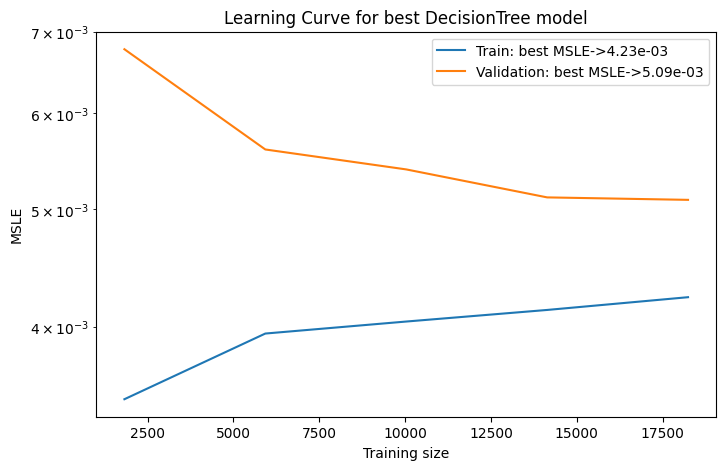




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_dpde_16X_rwsh.pkl" file !!!


In [6]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_dpde_16X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [7]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'14.74"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.006993345721788185



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 206.13550997,  263.34356985,  319.92665433, ...,  499.11268195,
         699.11268195, 1099.11268195],
       [ 330.44636271,  474.62711995,  581.97018365, ...,  866.12656724,
        1093.60559586, 1498.75057236],
       [ 351.71155233,  548.03682702,  777.04605051, ..., 1185.19597866,
        1463.49634949, 1873.80642612],
       ...,
       [ 206.13550997,  263.34356985,  319.92665433, ...,  499.11268195,
         699.11268195, 1099.11268195],
       [ 380.12488916,  862.70792907, 1032.69501479, ..., 1503.54773634,
        1842.0825248 , 2299.53331273],
       [ 235.79464595,  327.66607015,  422.33490828, ...,  910.66810317,
        1163.64427655, 1578.28892321]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00568472 0.00356177 0.00231667 0.00182901 0.00180722 0.00118059
 0.00116468 0.00317435]
Uniform average
0.0025898764364377467
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  674.91258665   862.19442212   844.11701071   902.176723
  1054.76809405  1116.56646376  1921.62139834 13196.84003915]
Uniform average
2571.6495922234903



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------

array([[ 206.13550997,  275.67351098,  404.50587896, ...,  639.18698705,
         839.65924137, 1239.65924137],
       [ 510.08601979,  718.34631334,  928.82465952, ..., 1534.73221532,
        2007.64931904, 2677.49542789],
       [ 358.57741269,  539.52678206,  777.97916376, ..., 1352.80078568,
        1812.77512914, 2486.7338267 ],
       ...,
       [ 379.91062517,  539.78939589,  676.7862771 , ..., 1042.30112122,
        1293.56476834, 1694.90779462],
       [ 270.78072606,  374.22207121,  514.67445624, ...,  916.36757167,
        1144.30608174, 1544.30608174],
       [ 232.31069571,  342.50757341,  473.16985713, ...,  856.44850646,
        1135.86541895, 1568.98128188]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01032554 0.00783159 0.00586796 0.00492221 0.00487178 0.00313762
 0.00419351 0.01353455]
Uniform average
0.006835594152558078
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1272.95118406  1985.90227653  2271.49578595  2562.60647625
  3006.65344162  3136.06307738  6943.51107399 54719.08229111]
Uniform average
9487.28320086101



>Learning curve


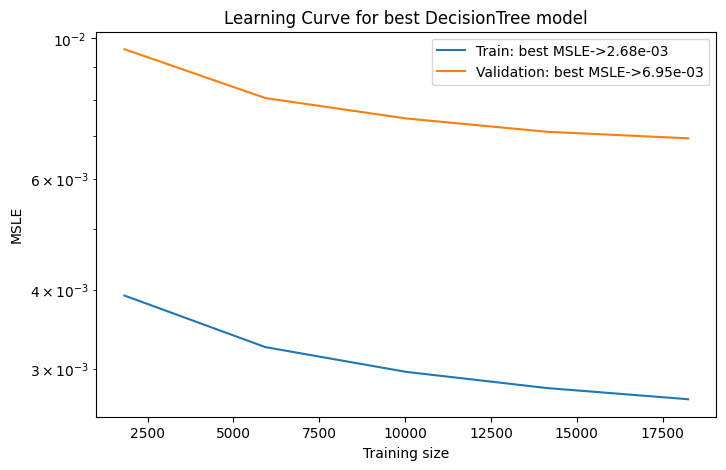




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_enrg_16X.pkl" file !!!


In [8]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_enrg_16X")

#### ->Using rowwise-shuffled data

In [9]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'15.05"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.012476917444760099



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 206.13550997,  263.34356985,  319.92665433, ...,  499.11271091,
         699.11271091, 1099.11271091],
       [ 300.05059929,  457.00076386,  559.95317314, ...,  910.90653368,
        1187.42841545, 1656.17582868],
       [ 369.9049671 ,  510.35792174,  668.53773715, ..., 1122.34818865,
        1448.75869795, 1933.74920928],
       ...,
       [ 206.13550997,  263.34356985,  319.92665433, ...,  499.11271091,
         699.11271091, 1099.11271091],
       [ 421.24578831,  680.8644158 ,  888.87537944, ..., 1386.35822124,
        1761.77584393, 2291.14749307],
       [ 221.46929356,  309.84884976,  448.101074  , ...,  916.85964659,
        1167.10269276, 1579.17323744]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01025114 0.00794397 0.00616846 0.00509161 0.0049152  0.00310786
 0.00324599 0.00869956]
Uniform average
0.006177972567160287
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1198.84876142  1841.33669628  2129.148871    2344.17264064
  2696.18108437  2733.31682644  5304.83739183 35894.35391416]
Uniform average
6767.774523268374



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------

array([[ 250.1867411 ,  327.17601583,  410.81149019, ...,  656.5905002 ,
         889.97419441, 1327.69391453],
       [ 486.25210558,  709.77826622,  930.31825095, ..., 1537.10314392,
        2010.63650189, 2681.25904244],
       [ 356.49717784,  559.43440432,  770.7479702 , ..., 1323.96442585,
        1772.47090438, 2429.56129877],
       ...,
       [ 408.97103846,  529.65197078,  655.06763167, ..., 1015.13917527,
        1261.37401203, 1662.41603769],
       [ 276.36049806,  380.1928945 ,  469.0917439 , ...,  800.20988224,
        1063.29493606, 1791.75178898],
       [ 259.04947702,  342.72271612,  431.97515443, ...,  892.30382824,
        1221.21172637, 1782.1619469 ]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01488138 0.01209853 0.01080593 0.00948058 0.00930398 0.00745597
 0.01019804 0.02396256]
Uniform average
0.012273371194524388
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1776.4006157   2943.89141653  4016.60703274  4724.67950151
  5506.37435058  6833.28391047 16556.85911088 94925.33498806]
Uniform average
17160.42886580796



>Learning curve


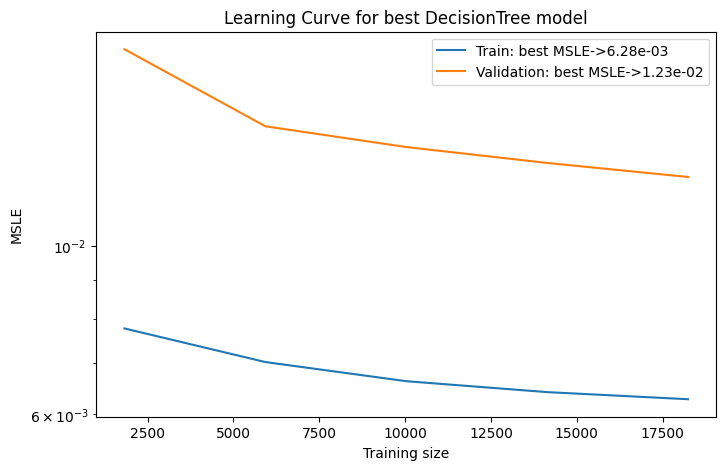




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_enrg_16X_rwsh.pkl" file !!!


In [10]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_enrg_16X_rwsh")

### C. Predicting polytropic parameter $\Gamma$ Values

#### ->Using non-shuffled data

In [11]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'14.66"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.0462288021822836



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.996337  , 3.99084249, 2.58241758, 2.52197802],
       [1.97826087, 1.26086957, 3.47826087, 3.4673913 ],
       [2.75      , 2.7       , 1.8       , 3.9       ],
       ...,
       [4.        , 3.99415205, 2.88888889, 2.56140351],
       [2.04597701, 1.88505747, 1.55172414, 3.91954023],
       [2.64      , 3.192     , 2.056     , 3.248     ]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.0160696  0.03504625 0.03832169 0.03948733]
Uniform average
0.03223121845914475
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.1641949  0.38610111 0.42564467 0.489848  ]
Uniform average
0.3664471713073749



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.85964912, 2.15789474, 3.84210526, 2.49122807],
       [1.2       , 2.06666667, 2.73333333, 3.        ],
       [2.8       , 3.2       , 1.        , 3.        ],
       ...,
       [3.42068966, 2.24827586, 3.26896552, 3.63448276],
       [2.        , 3.0625    , 1.65625   , 3.78125   ],
       [2.13559322, 3.74576271, 1.89830508, 3.47457627]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.02129861 0.05040256 0.05586474 0.05016196]
Uniform average
0.04443196724417093
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.21746007 0.56414894 0.62229673 0.63655018]
Uniform average
0.510113978460204



>Learning curve


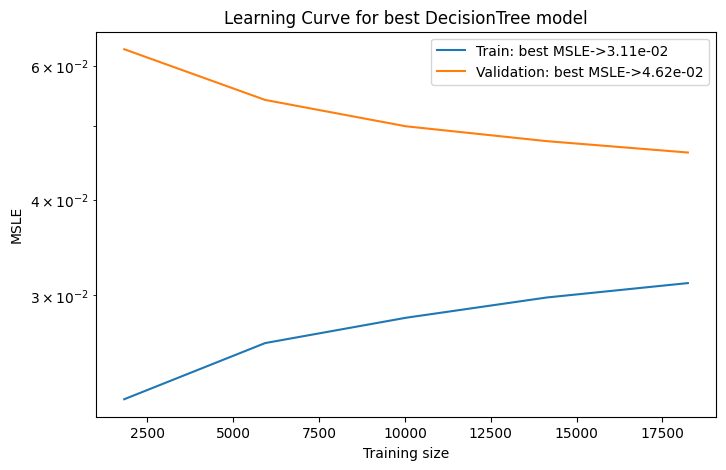




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_gamma_16X.pkl" file !!!


In [12]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="Gamma",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_gamma_16X")

#### ->Using rowwise-shuffled data

In [13]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'14.47"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.07388560984174056



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.83396226, 3.60424528, 2.72735849, 2.64009434],
       [2.54160512, 2.87050714, 2.47464303, 2.93353028],
       [2.62857143, 2.02857143, 3.05714286, 3.4       ],
       ...,
       [3.83396226, 3.60424528, 2.72735849, 2.64009434],
       [2.13636364, 1.77272727, 1.40909091, 3.81818182],
       [3.09210526, 2.80921053, 2.52631579, 2.92763158]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.05013894 0.06193421 0.0719664  0.05374917]
Uniform average
0.05944718139898099
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.52402855 0.69781159 0.80650392 0.6789644 ]
Uniform average
0.6768271168465135



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.40789474, 2.625     , 3.00657895, 2.98684211],
       [1.38461538, 2.15384615, 1.53846154, 3.76923077],
       [2.54160512, 2.87050714, 2.47464303, 2.93353028],
       ...,
       [1.79640152, 3.13825758, 3.26041667, 3.18276515],
       [1.81818182, 1.63636364, 3.72727273, 3.81818182],
       [2.54160512, 2.87050714, 2.47464303, 2.93353028]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.05782698 0.07865829 0.08839935 0.0574924 ]
Uniform average
0.0705942547624262
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.611624   0.87083021 0.97790961 0.73836297]
Uniform average
0.7996816984120267



>Learning curve


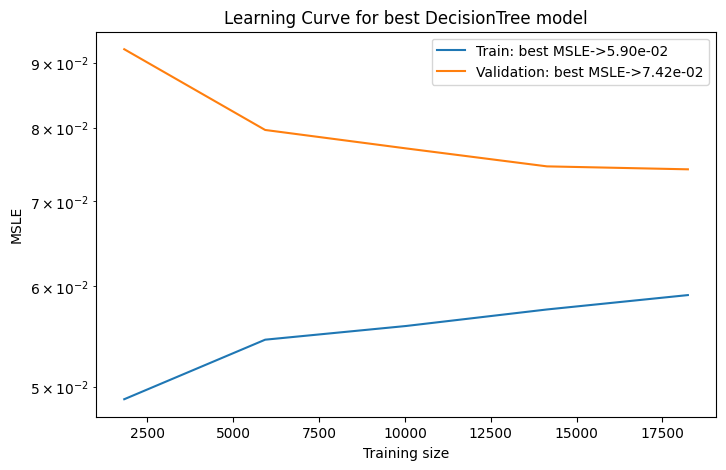




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_gamma_16X_rwsh.pkl" file !!!


In [14]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="Gamma",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_gamma_16X_rwsh")

### D. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [15]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'12.60"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.05197771439886165



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 557.28820513, 1307.5       , 1846.65798046, ...,  557.28820513,
       2254.11428571, 1131.66666667])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.02808633]
Uniform average
0.02808633064098736
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[31008.7637494]
Uniform average
31008.763749402755



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 733.05722892, 1281.39782016, 1286.375     , ..., 1541.95508982,
       1268.70334928, 1015.29756098])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.0517271]
Uniform average
0.051727102190152134
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[58970.14888621]
Uniform average
58970.14888620761



>Learning curve


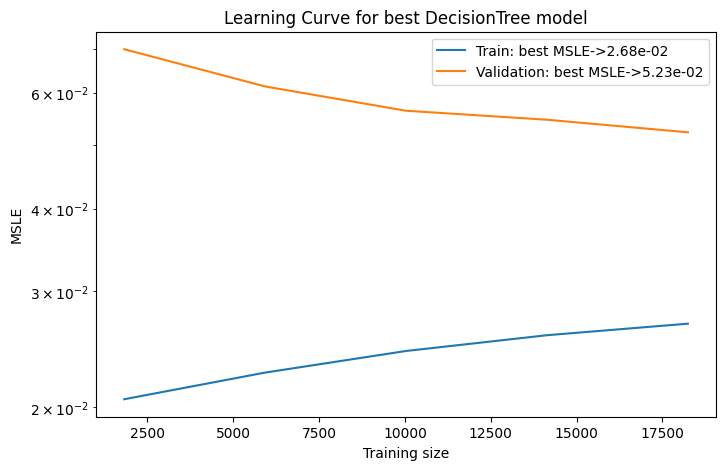




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_PcMmax_16X.pkl" file !!!


In [16]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_PcMmax_16X")

#### ->Using rowwise-shuffled data

In [17]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'12.98"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.11018856680821769



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 549.5040293 , 1382.        , 1846.4       , ...,  549.5040293 ,
       1476.85714286,  624.36619718])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.08371571]
Uniform average
0.08371571468276097
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[64033.65132642]
Uniform average
64033.65132642491



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 549.5040293 , 1543.51037344, 1785.57142857, ..., 1621.71428571,
        895.1712963 , 1044.33333333])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.10920821]
Uniform average
0.10920820936248886
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[106587.87451751]
Uniform average
106587.8745175051



>Learning curve


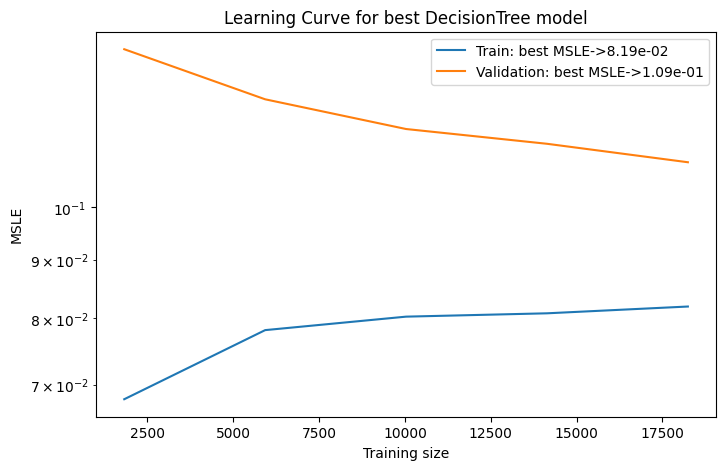




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_PcMmax_16X_rwsh.pkl" file !!!


In [18]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_PcMmax_16X_rwsh")

## **1.2 Using 16 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [19]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'24.32"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.0029555639524727604



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.18506908, 0.3468085 , 0.54064771, ..., 1.        , 1.        ,
        1.        ],
       [0.06908469, 0.16151881, 0.22917145, ..., 0.69124946, 0.96797591,
        0.99592278],
       [0.0603544 , 0.10782711, 0.19772999, ..., 0.54367278, 0.80833328,
        0.9850573 ],
       ...,
       [0.18506908, 0.3468085 , 0.54064771, ..., 1.        , 1.        ,
        1.        ],
       [0.03572169, 0.09864515, 0.176458  , ..., 0.43278703, 0.64744867,
        0.89705388],
       [0.13684167, 0.23073694, 0.36252838, ..., 0.68023206, 0.95721948,
        0.99437308]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00044782 0.00110726 0.00181412 0.00184997 0.00150486 0.00204818
 0.0032273  0.00301351]
Uniform average
0.0018766272859684682
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00054106 0.00150897 0.00288468 0.00328164 0.00298443 0.005408
 0.00954462 0.00871513]
Uniform average
0.004358565682012921



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------------------------------------

array([[0.15388161, 0.19948237, 0.30183012, ..., 0.93981671, 0.99799588,
        1.        ],
       [0.03368862, 0.1050638 , 0.16232453, ..., 0.39927467, 0.60022626,
        0.8620253 ],
       [0.06352725, 0.10754854, 0.19263503, ..., 0.53178257, 0.78988031,
        0.97529916],
       ...,
       [0.08706116, 0.18284216, 0.25564095, ..., 0.59844141, 0.86235753,
        0.97571087],
       [0.10654271, 0.20385122, 0.31130056, ..., 0.61796848, 0.83796338,
        0.9489112 ],
       [0.13684167, 0.23073694, 0.36252838, ..., 0.68023206, 0.95721948,
        0.99437308]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00050979 0.00123635 0.00234119 0.00233795 0.00201377 0.00314658
 0.0054406  0.00558359]
Uniform average
0.002826228397245614
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00061826 0.00169958 0.00376069 0.00419588 0.00404561 0.00827375
 0.01559493 0.01583219]
Uniform average
0.006752611453382472



>Learning curve


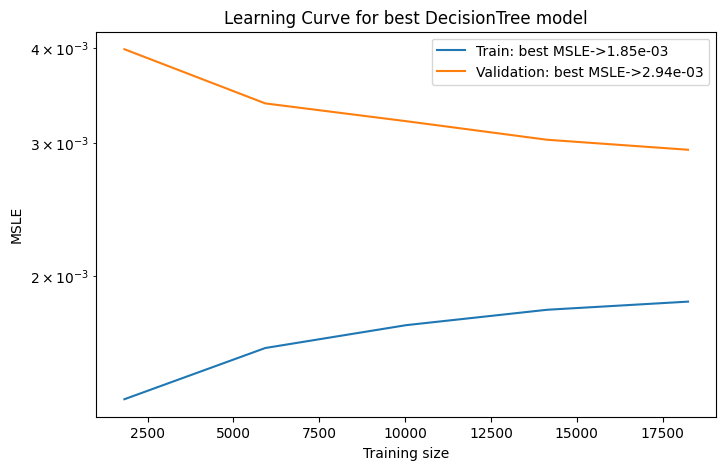




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_dpde_32X.pkl" file !!!


In [20]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_dpde_32X")

#### ->Using rowwise-shuffled data

In [21]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'27.60"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.005550080081419742



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.18506908, 0.3468085 , 0.54064771, ..., 1.        , 1.        ,
        1.        ],
       [0.08879064, 0.18542837, 0.26527228, ..., 0.57550723, 0.80782408,
        0.87217418],
       [0.06365997, 0.11827112, 0.18460014, ..., 0.4140393 , 0.59662565,
        0.79237411],
       ...,
       [0.18506908, 0.29037894, 0.43981831, ..., 0.96177932, 0.99574399,
        0.90940438],
       [0.06365997, 0.11827112, 0.18460014, ..., 0.4140393 , 0.59662565,
        0.79237411],
       [0.12677087, 0.19895424, 0.3109941 , ..., 0.61302055, 0.80462859,
        0.89611288]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00071537 0.00195119 0.00351988 0.00385788 0.00394887 0.00570974
 0.00896159 0.00944794]
Uniform average
0.00476405738727826
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00086984 0.00268213 0.00568202 0.00702929 0.00785085 0.01455626
 0.02519564 0.02732929]
Uniform average
0.011399414435768026



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------------------------------------

array([[0.1386479 , 0.23898551, 0.39396086, ..., 0.8662495 , 0.98457691,
        1.        ],
       [0.06365997, 0.11827112, 0.18460014, ..., 0.4140393 , 0.59662565,
        0.79237411],
       [0.06365997, 0.11827112, 0.18460014, ..., 0.4140393 , 0.59662565,
        0.79237411],
       ...,
       [0.09322376, 0.17812896, 0.26549802, ..., 0.66888396, 0.89067307,
        0.94556599],
       [0.13491752, 0.21269908, 0.34179838, ..., 0.69404717, 0.87597046,
        0.93209875],
       [0.13318722, 0.20168586, 0.31868995, ..., 0.64685279, 0.82653453,
        0.89424128]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.0007498  0.00200125 0.0038919  0.00438492 0.00482216 0.0071668
 0.01051094 0.01075275]
Uniform average
0.005535065057979309
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00091164 0.00277646 0.00634875 0.00812863 0.01000239 0.01877558
 0.0297544  0.03105126]
Uniform average
0.01346863934051261



>Learning curve


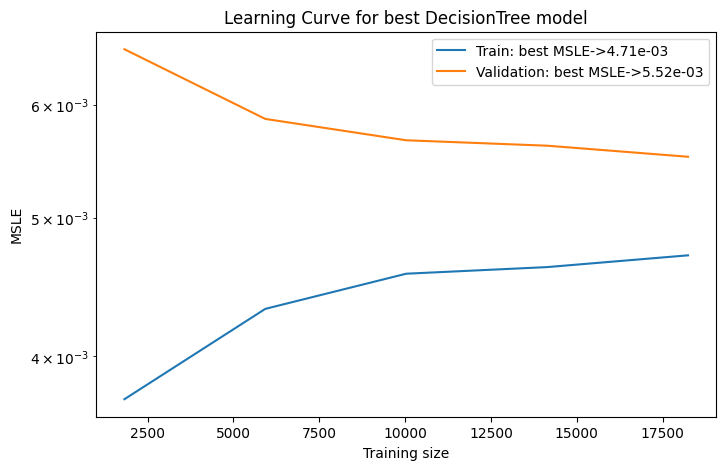




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_dpde_32X_rwsh.pkl" file !!!


In [22]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_dpde_32X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [23]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'25.04"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.006568995380717131



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 206.13550997,  263.34356985,  319.92665433, ...,  499.11276291,
         699.11276291, 1099.11276291],
       [ 309.68590505,  441.40215194,  558.53833271, ...,  910.88650849,
        1138.03990126, 1538.03990126],
       [ 384.73505211,  552.57373827,  723.15433988, ..., 1140.42065412,
        1469.43250335, 1952.42424487],
       ...,
       [ 206.13550997,  263.34356985,  319.92665433, ...,  499.11105376,
         699.11105376, 1099.11105376],
       [ 390.38296692,  828.42955517, 1013.02220482, ..., 1511.53277514,
        1877.39840581, 2377.9007398 ],
       [ 212.02037087,  305.81682524,  489.38557308, ...,  916.26269598,
        1163.69667063, 1574.68443609]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.0051564  0.00317847 0.00208772 0.00155173 0.00149846 0.00096594
 0.00086837 0.00256696]
Uniform average
0.0022342565957819372
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  608.19883751   762.47830856   739.74704198   750.46122283
   862.15614977   911.5196913   1456.57027824 10933.74859583]
Uniform average
2128.11001575303



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------

array([[ 210.84339869,  284.02497398,  405.44245645, ...,  637.30394946,
         837.73644516, 1237.73644516],
       [ 533.00523392,  729.11335431,  927.87624973, ..., 1533.22670862,
        2005.75249946, 2675.10558497],
       [ 352.03582357,  469.48709404,  729.92941053, ..., 1334.63953468,
        1755.54833877, 2359.86809615],
       ...,
       [ 410.20627877,  558.28479365,  677.30022741, ..., 1093.98863025,
        1476.56665909, 2048.04379751],
       [ 286.76842611,  391.70184085,  490.30876346, ...,  820.65029578,
        1107.96247727, 1544.63616188],
       [ 266.39310789,  339.11348786,  410.03277993, ...,  842.37303944,
        1120.50943048, 1556.07115095]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01047717 0.00794507 0.0056548  0.00449502 0.00454585 0.00284719
 0.0033032  0.01039234]
Uniform average
0.006207580272075094
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1313.63988979  1987.11543654  2198.92519625  2352.81488263
  2802.23953374  2823.70487683  5578.7801962  43672.93948414]
Uniform average
7841.269937015839



>Learning curve


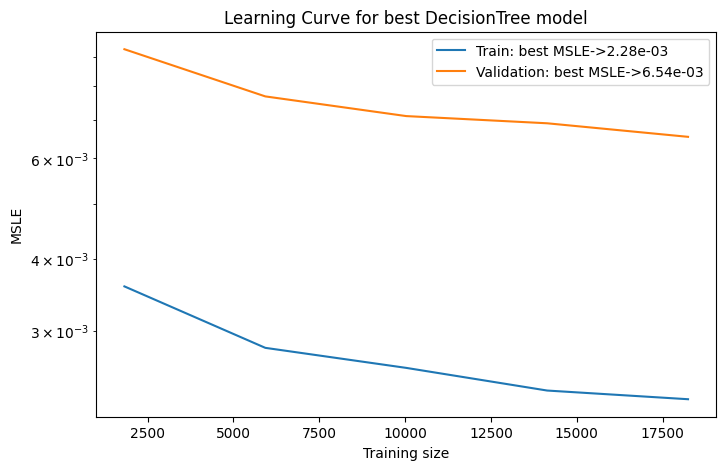




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_enrg_32X.pkl" file !!!


In [24]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_enrg_32X")

#### ->Using rowwise-shuffled data

In [25]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'25.50"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.01461290231106333



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 206.13550997,  263.34356985,  319.92665433, ...,  499.11242635,
         699.11242635, 1099.11242635],
       [ 344.04092193,  483.83494267,  591.78386335, ...,  903.54880167,
        1141.77821613, 1552.39927341],
       [ 409.67987006,  585.54006179,  777.38997894, ..., 1195.50189262,
        1498.51893312, 1945.66144242],
       ...,
       [ 206.13550997,  263.34356985,  319.92665433, ...,  499.11193921,
         699.11193921, 1099.11193921],
       [ 406.72948325,  768.91078777,  995.13339607, ..., 1517.73762555,
        1907.48169268, 2445.69799772],
       [ 271.83577902,  369.51307736,  469.36019821, ...,  872.34671514,
        1191.81399604, 1715.71693337]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01019348 0.00789423 0.00688311 0.00596378 0.00585966 0.00365136
 0.00373478 0.00922447]
Uniform average
0.006675608064369846
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1167.92367124  1786.4199467   2279.89032321  2609.45157118
  3062.11523208  3101.46473067  6010.87504682 38697.88336398]
Uniform average
7339.502985735859



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------

array([[ 210.84339869,  273.7497654 ,  349.42418147, ...,  581.29253032,
         793.77025079, 1193.95137722],
       [ 418.64955107,  657.40174648,  950.36238709, ..., 1540.91145669,
        1997.39513065, 2640.3815278 ],
       [ 450.53077189,  623.04614188,  857.48655753, ..., 1316.7328294 ,
        1667.92366332, 2166.33496261],
       ...,
       [ 362.91418595,  522.5388304 ,  720.74869309, ..., 1212.5178233 ,
        1608.72133901, 2205.83471802],
       [ 237.81848509,  412.3708153 ,  561.93422304, ...,  950.32732804,
        1314.02797699, 1886.17800966],
       [ 273.7776241 ,  384.1710105 ,  489.60606953, ...,  836.07957188,
        1090.42451655, 1547.90673817]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01456676 0.0121543  0.01200721 0.0115353  0.01183814 0.01098111
 0.01451466 0.02824648]
Uniform average
0.014480494188542914
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  1785.02315395   2871.59571276   4236.94773639   5322.67633037
   6454.39819666   9234.88140694  22409.66839027 106665.35790093]
Uniform average
19872.568603534615



>Learning curve


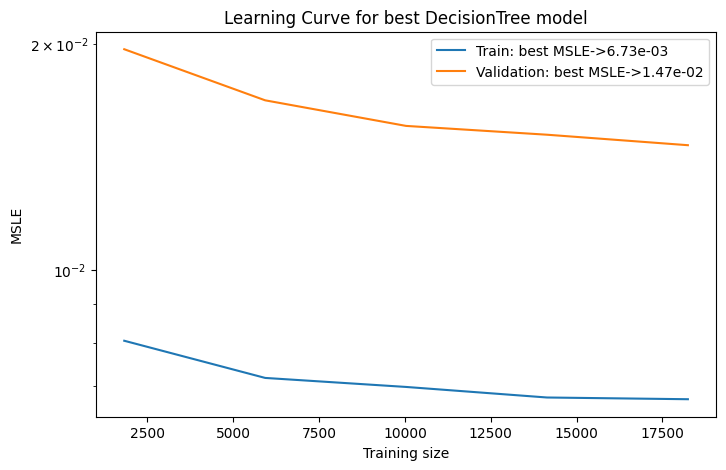




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_enrg_32X_rwsh.pkl" file !!!


In [26]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_enrg_32X_rwsh")

### C. Predicting polytropic parameter $\Gamma$ Values

#### ->Using non-shuffled data

In [27]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'26.45"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.04149222173408087



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[4.        , 4.        , 2.68674699, 3.06024096],
       [1.17391304, 2.34782609, 3.43478261, 3.26086957],
       [1.25925926, 3.2962963 , 2.7037037 , 3.40740741],
       ...,
       [4.        , 4.        , 2.64640884, 2.96132597],
       [2.96491228, 1.07017544, 1.05263158, 3.96491228],
       [2.15      , 3.65      , 1.4       , 3.55      ]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01394259 0.03051912 0.03400113 0.02707036]
Uniform average
0.02638330081683389
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.1375252  0.33764053 0.38430213 0.36993799]
Uniform average
0.3073514637545176



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.85227273, 2.10227273, 3.38636364, 3.65909091],
       [1.6122449 , 2.28571429, 2.04081633, 3.53061224],
       [3.        , 2.82258065, 1.51612903, 3.90322581],
       ...,
       [2.02666667, 2.40666667, 3.40666667, 3.58666667],
       [2.83333333, 1.73333333, 3.43333333, 3.56666667],
       [2.02380952, 3.88095238, 1.69047619, 3.52380952]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01975585 0.04574561 0.05309969 0.03886116]
Uniform average
0.039365577199833454
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.20273117 0.51901604 0.60097337 0.52099819]
Uniform average
0.46092969391283267



>Learning curve


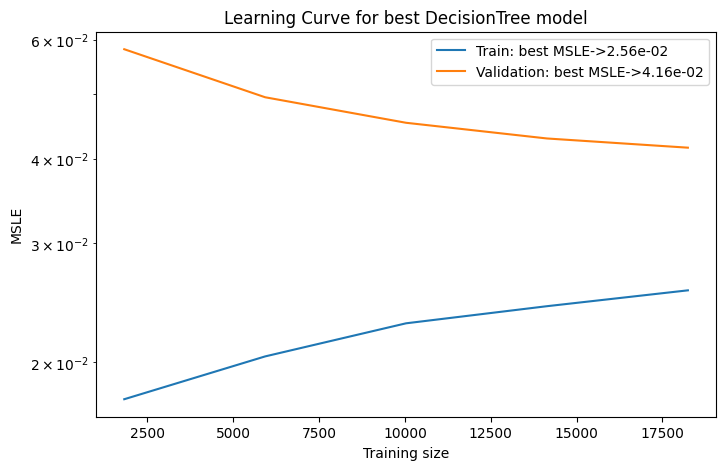




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_gamma_32X.pkl" file !!!


In [28]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="Gamma",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_gamma_32X")

#### ->Using rowwise-shuffled data

In [29]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'25.27"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.07784062361700046



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.89795918, 3.93877551, 2.73469388, 2.6122449 ],
       [2.53080569, 2.60189573, 2.59241706, 3.18483412],
       [1.92418301, 2.59673203, 2.90915033, 3.34705882],
       ...,
       [4.        , 3.875     , 3.5       , 3.875     ],
       [1.67579909, 2.3173516 , 2.57534247, 3.51141553],
       [3.12820513, 3.03418803, 2.68717949, 2.85641026]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.07080874 0.08025126 0.08357071 0.05662559]
Uniform average
0.07281407425800163
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.7404586  0.88879363 0.92419648 0.71696396]
Uniform average
0.8176031713887213



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.31415929, 2.92035398, 2.73451327, 2.75221239],
       [1.92418301, 2.59673203, 2.90915033, 3.34705882],
       [2.05479452, 2.65479452, 2.4109589 , 3.29863014],
       ...,
       [2.41655323, 2.64933297, 2.36781922, 2.99727743],
       [2.53080569, 2.60189573, 2.59241706, 3.18483412],
       [3.01567398, 2.66144201, 2.65517241, 3.09717868]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.07387537 0.08144138 0.08868445 0.05828914]
Uniform average
0.07557258696501974
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.77502623 0.9042235  0.98127818 0.745788  ]
Uniform average
0.851578977741374



>Learning curve


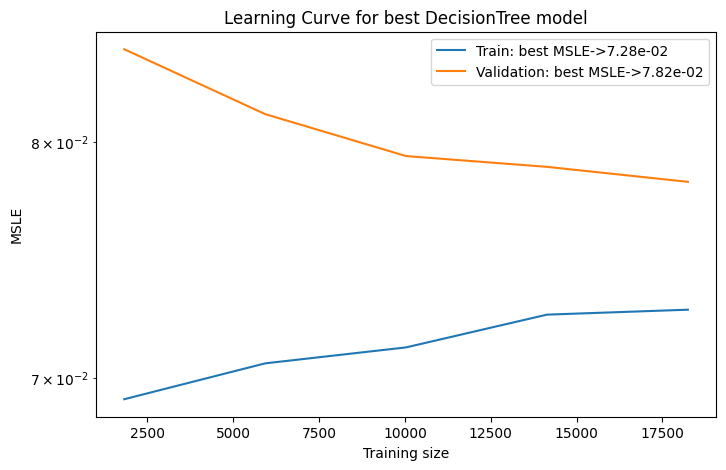




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_gamma_32X_rwsh.pkl" file !!!


In [30]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="Gamma",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_gamma_32X_rwsh")

### D. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [31]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'21.38"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.0494204292456769



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 557.7065678 , 1395.51851852, 2198.74561404, ...,  557.7065678 ,
       1266.36296296, 1116.        ])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.02446499]
Uniform average
0.024464987247892794
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[27150.15903505]
Uniform average
27150.159035048768



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 859.01176471, 1266.36296296, 2085.6       , ...,  754.8       ,
       1001.80697674,  944.84946237])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.0489886]
Uniform average
0.04898859551633227
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[57194.14070095]
Uniform average
57194.1407009524



>Learning curve


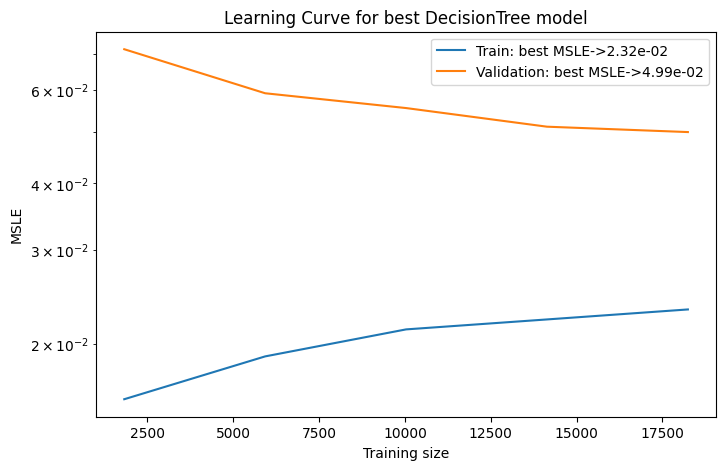




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_PcMmax_32X.pkl" file !!!


In [32]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_PcMmax_32X")

#### ->Using rowwise-shuffled data

In [33]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'21.70"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5,
                      min_samples_split=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.12820447653979467



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 665.7251462 , 1465.53043478, 1847.58823529, ...,  541.568     ,
       1300.66666667,  706.7244898 ])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.1034585]
Uniform average
0.1034584959096461
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[83600.34817614]
Uniform average
83600.34817613519



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 834.76432079, 2269.        , 1385.41509434, ..., 1378.27777778,
        897.75106082, 1001.37037037])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.12829868]
Uniform average
0.1282986799385631
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[123021.69408196]
Uniform average
123021.69408196484



>Learning curve


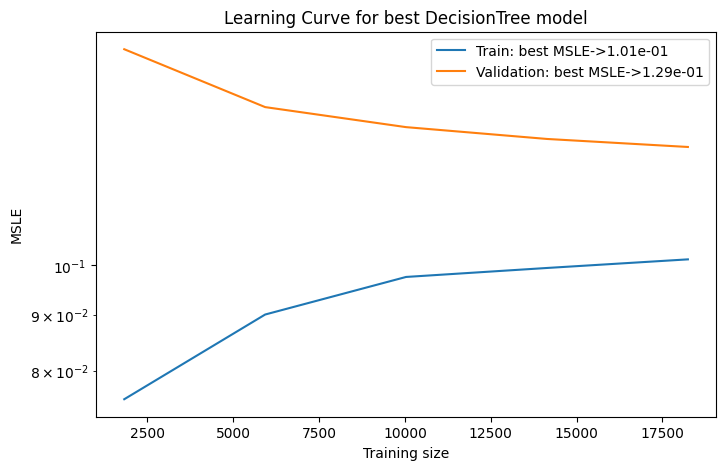




>Saving the grid search info:
The grid search info is saved in the "NS_dtree_grid_PcMmax_32X_rwsh.pkl" file !!!


In [34]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="NS_dtree_grid_PcMmax_32X_rwsh")

# 2. Quark Stars

## **2.1 Using 8 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [35]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'28.12"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.0005904547756382806



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.53715923, 0.4945498 , 0.45002219, ..., 0.4022702 , 0.396364  ,
        0.39169713],
       [0.48288295, 0.44331322, 0.40902203, ..., 0.37687297, 0.3730949 ,
        0.37012891],
       [0.46821587, 0.42974111, 0.39866652, ..., 0.37059572, 0.36733988,
        0.3647885 ],
       ...,
       [0.36833954, 0.35958764, 0.35186074, ..., 0.34433514, 0.34342428,
        0.34270446],
       [0.68196935, 0.57675295, 0.49240989, ..., 0.42003393, 0.41198099,
        0.40572756],
       [0.39204341, 0.37622933, 0.36300813, ..., 0.35064361, 0.3491775 ,
        0.34802328]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00113269 0.00079571 0.00045596 0.00026882 0.00020891 0.00017006
 0.00014295 0.00012304]
Uniform average
0.00041226761273769415
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00247614 0.00167037 0.00091629 0.00052459 0.00040315 0.00032552
 0.00027195 0.00023293]
Uniform average
0.0008526186755921893



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-----------------------------------------------------------------------------------------

array([[0.48277222, 0.44710598, 0.41362802, ..., 0.38020425, 0.3761742 ,
        0.37299939],
       [0.66046191, 0.55564773, 0.47677003, ..., 0.41123642, 0.40401061,
        0.39840364],
       [0.43731665, 0.41627899, 0.3942505 , ..., 0.37016066, 0.36712272,
        0.36471044],
       ...,
       [0.70224567, 0.59290826, 0.50352604, ..., 0.42601842, 0.41737708,
        0.41066741],
       [0.3987853 , 0.38165654, 0.36698253, ..., 0.35302945, 0.35136449,
        0.35005266],
       [0.43944483, 0.41592885, 0.39276713, ..., 0.36863961, 0.3656666 ,
        0.36331536]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00159789 0.00112617 0.00064199 0.00037675 0.0002923  0.00023766
 0.00019961 0.0001717 ]
Uniform average
0.0005805079667239765
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00351504 0.00237164 0.00129155 0.0007355  0.00056418 0.00045498
 0.00037977 0.00032505]
Uniform average
0.0012047122442855726



>Learning curve


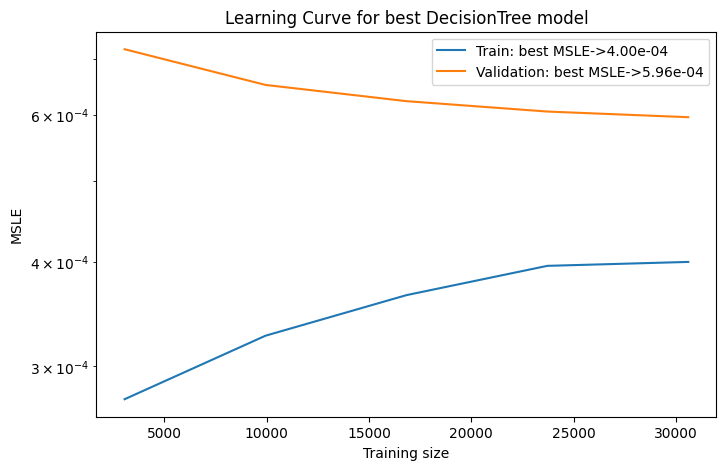




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_dpde_16X.pkl" file !!!


In [36]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_dpde_16X")

#### ->Using rowwise-shuffled data

In [37]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'35.54"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.0008981762415722887



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.49972455, 0.45992435, 0.4225352 , ..., 0.3851943 , 0.38070081,
        0.3771636 ],
       [0.44234912, 0.41781445, 0.39397384, ..., 0.36926561, 0.36622717,
        0.36382529],
       [0.51415536, 0.46364753, 0.42169343, ..., 0.38336986, 0.3789322 ,
        0.37545931],
       ...,
       [0.44234912, 0.41781445, 0.39397384, ..., 0.36926561, 0.36622717,
        0.36382529],
       [0.65471357, 0.56098976, 0.48378124, ..., 0.41608175, 0.40846911,
        0.40254683],
       [0.44234912, 0.41781445, 0.39397384, ..., 0.36926561, 0.36622717,
        0.36382529]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00224322 0.00154752 0.00087259 0.00051025 0.00039561 0.00032157
 0.00027007 0.00023231]
Uniform average
0.0007991438577819505
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00489128 0.00323452 0.00174613 0.00099221 0.00076097 0.00061373
 0.00051239 0.00043867]
Uniform average
0.0016487360128311188



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
------------------------------------------------------------------------------------------

array([[0.44234912, 0.41781445, 0.39397384, ..., 0.36926561, 0.36622717,
        0.36382529],
       [0.70609601, 0.59571291, 0.50537563, ..., 0.42699409, 0.41825552,
        0.41147075],
       [0.44837851, 0.42370155, 0.39885857, ..., 0.37242862, 0.36914225,
        0.36654007],
       ...,
       [0.63164625, 0.53461619, 0.46307135, ..., 0.40399204, 0.39747427,
        0.39241412],
       [0.47433569, 0.44477954, 0.41434318, ..., 0.3816152 , 0.37753877,
        0.37431154],
       [0.44234912, 0.41781445, 0.39397384, ..., 0.36926561, 0.36622717,
        0.36382529]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00248884 0.00171716 0.00096239 0.00056012 0.00043352 0.00035196
 0.00029534 0.00025387]
Uniform average
0.0008829005421412738
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00547534 0.00360809 0.00193081 0.00109078 0.00083486 0.00067239
 0.00056079 0.00047973]
Uniform average
0.0018316000112484324



>Learning curve


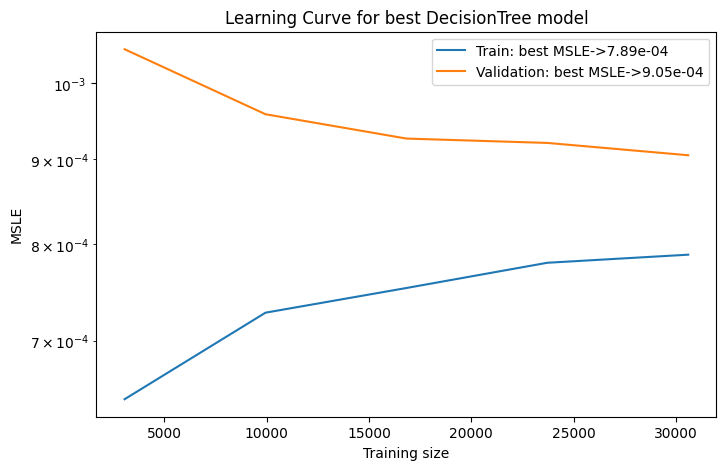




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_dpde_16X_rwsh.pkl" file !!!


In [38]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_dpde_16X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'27.19"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.0036316668354110966



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 363.64272856,  570.01373343, 1060.8374036 , ..., 2902.65512969,
        3444.94358399, 3991.3400985 ],
       [ 293.53186867,  492.18361942,  971.17906209, ..., 2787.2410667 ,
        3323.93915882, 3865.17138658],
       [ 260.75271912,  499.91158094, 1051.63834013, ..., 3044.50300461,
        3621.08296595, 4199.41960823],
       ...,
       [ 395.2344719 ,  636.16494478, 1187.42017179, ..., 3174.23337312,
        3749.10614543, 4325.79833863],
       [ 177.47004681,  321.65443261,  698.31059795, ..., 2255.48454352,
        2732.8968408 , 3218.81145642],
       [ 322.24694264,  543.61372544, 1062.86176797, ..., 2976.64187945,
        3535.40058527, 4097.16239837]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00613812 0.00167994 0.00169707 0.00221467 0.00228012 0.00225169
 0.00218243 0.00209714]
Uniform average
0.002567648077638216
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1146.22791756   703.1153347   1888.31444739  7247.95782887
 12355.28861824 18328.42487974 24982.4859734  32190.22844125]
Uniform average
12355.255430144465



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
--------------------------------------------------------------

array([[ 367.4947489 ,  570.68544919, 1054.00706892, ..., 2873.46710365,
        3410.32727658, 3951.60104086],
       [ 156.69628949,  304.87940864,  694.13289296, ..., 2292.99248578,
        2780.76780662, 3276.49762686],
       [ 454.80613838,  676.65431024, 1191.5233879 , ..., 3084.62106828,
        3637.85527823, 4194.32167243],
       ...,
       [ 158.09045177,  295.00319887,  656.35941398, ..., 2171.37066146,
        2638.82820557, 3115.40006407],
       [ 325.68575609,  576.68277348, 1146.05265191, ..., 3176.79587878,
        3761.56077289, 4347.45237644],
       [ 420.31291157,  633.43909242, 1134.01024938, ..., 2994.76782859,
        3540.90752799, 4090.80934648]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00771145 0.00179313 0.00245889 0.00339379 0.00350336 0.00345754
 0.00334669 0.00321129]
Uniform average
0.0036095173532559796
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1384.11648244   737.78156087  2657.0002285  10992.21904149
 18861.20403735 28026.99262306 38209.36089255 49216.38605143]
Uniform average
18760.63261471144



>Learning curve


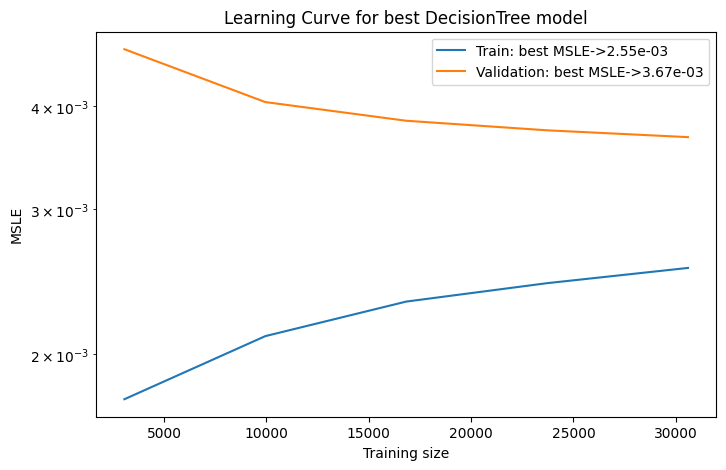




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_enrg_16X.pkl" file !!!


In [39]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_enrg_16X")

#### ->Using rowwise-shuffled data

In [40]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'36.97"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=20, max_features='log2', min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.006733474992896539



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 383.81505876,  564.52717055, 1004.38920749, ..., 2711.16743206,
        3221.97596006, 3738.89586137],
       [ 289.7285983 ,  506.23004288, 1016.71278837, ..., 2908.26972259,
        3461.90605153, 4018.88009791],
       [ 277.84888348,  508.57165465, 1045.01567283, ..., 3000.48890704,
        3568.61776114, 4139.08930371],
       ...,
       [ 411.82584939,  650.73846439, 1197.13456895, ..., 3169.42591245,
        3740.77373312, 4314.13971321],
       [ 187.2996353 ,  348.85246398,  762.92898119, ..., 2422.96051027,
        2924.56788359, 3433.16930706],
       [ 347.43373665,  576.68638205, 1107.07259403, ..., 3042.35924019,
        3605.5029561 , 4171.26084323]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00934993 0.00290382 0.00224383 0.00259231 0.00260927 0.0025466
 0.00245078 0.00234388]
Uniform average
0.0033800508603671767
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1573.30203367  1110.19822755  2483.24607095  8481.6446986
 14158.05372857 20777.92630711 28138.48707613 36100.55153116]
Uniform average
14102.926209218764



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------

array([[ 309.00306301,  549.64257713, 1102.15599529, ..., 3094.46185287,
        3670.74507787, 4248.77776879],
       [ 155.09724785,  304.81022968,  697.97848659, ..., 2308.56373825,
        2799.16614751, 3297.5582837 ],
       [ 494.04932459,  678.62061527, 1121.03112649, ..., 2822.50803026,
        3330.94076378, 3845.41657239],
       ...,
       [ 171.14477097,  316.33613886,  696.48968653, ..., 2265.8699688 ,
        2746.37017375, 3235.21940248],
       [ 415.57212752,  647.5350744 , 1182.45250515, ..., 3128.96587297,
        3694.69702435, 4262.87510939],
       [ 398.69014279,  600.89955214, 1080.65867064, ..., 2887.37614196,
        3420.97970037, 3959.15141335]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01340141 0.00389255 0.00508419 0.00630575 0.00632166 0.00612671
 0.00585682 0.00556876]
Uniform average
0.006569730998999981
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 2074.85931344  1322.73079068  5160.37591707 19738.26229399
 33151.02183801 48621.3465871  65698.65351496 84076.01955129]
Uniform average
32480.40872581722



>Learning curve


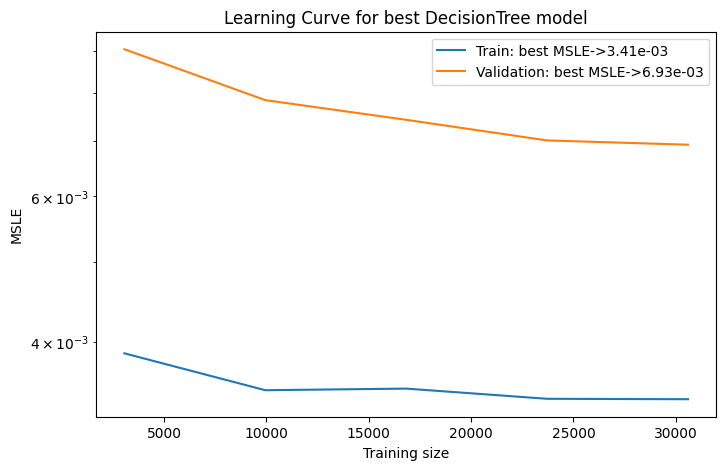




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_enrg_16X_rwsh.pkl" file !!!


In [41]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_enrg_16X_rwsh")

### C. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [44]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'20.61"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.009366653607284187



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([557.37931034, 387.35820896, 307.51851852, ..., 429.25925926,
       221.76595745, 403.51851852])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00589579]
Uniform average
0.005895790992676048
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[1524.24493582]
Uniform average
1524.2449358166377



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([435.525     , 212.34782609, 662.86666667, ..., 211.56410256,
       414.79365079, 514.66153846])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00906775]
Uniform average
0.00906775079272936
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[2366.17765048]
Uniform average
2366.1776504814343



>Learning curve


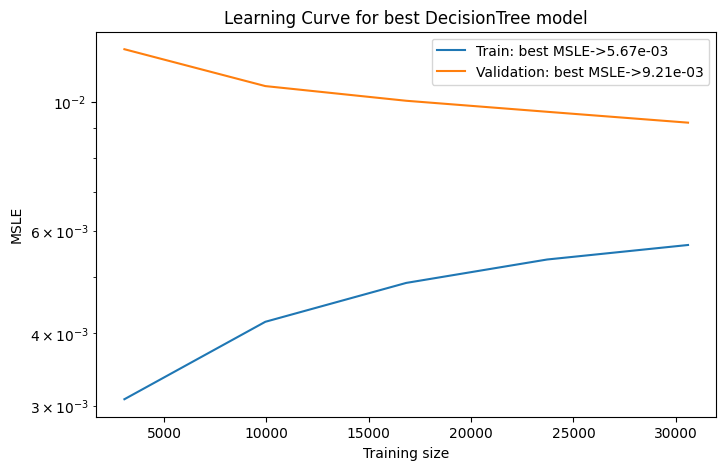




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_PcMmax_16X.pkl" file !!!


In [45]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_PcMmax_16X")

#### ->Using rowwise-shuffled data

In [46]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'21.40"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.015861909995291516



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([473.28571429, 363.45833333, 340.890625  , ..., 457.91666667,
       230.71428571, 392.09677419])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01141719]
Uniform average
0.011417192162850504
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[2869.82606464]
Uniform average
2869.8260646448075



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([430.79245283, 236.06060606, 655.875     , ..., 209.30769231,
       485.        , 535.35099338])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01590084]
Uniform average
0.015900838804079286
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[3635.9509114]
Uniform average
3635.950911400532



>Learning curve


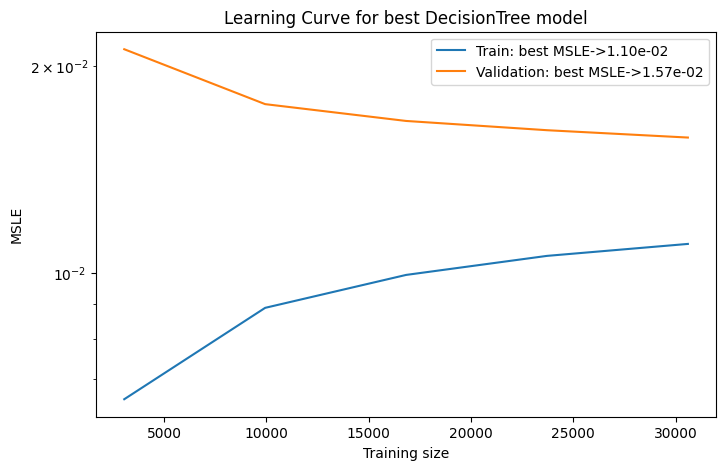




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_PcMmax_16X_rwsh.pkl" file !!!


In [47]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_PcMmax_16X_rwsh")

## **2.2 Using 16 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'48.84"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.0005706200864851352



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.45091971, 0.42204116, 0.39573292, ..., 0.36998996, 0.36689371,
        0.36445215],
       [0.41149653, 0.38770066, 0.36984778, ..., 0.35424781, 0.35244692,
        0.35103472],
       [0.38948101, 0.37360507, 0.36093179, ..., 0.34935226, 0.34799013,
        0.34691893],
       ...,
       [0.37448646, 0.36423207, 0.35513165, ..., 0.34625437, 0.34518074,
        0.34433258],
       [0.61785703, 0.53291399, 0.46509649, ..., 0.40607357, 0.39942763,
        0.39425361],
       [0.39426299, 0.3779131 , 0.36418297, ..., 0.3513167 , 0.34979099,
        0.34859001]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00112614 0.00078705 0.0004496  0.00026476 0.00020571 0.00016743
 0.00014074 0.00012113]
Uniform average
0.0004078202155832789
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00245638 0.00164945 0.00090243 0.00051622 0.00039666 0.00032027
 0.00026757 0.00022917]
Uniform average
0.0008422696448485084



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
------------------------------------------------------------------------------------------

array([[0.37114577, 0.35988707, 0.35134069, ..., 0.34378339, 0.34290193,
        0.34220892],
       [0.67744698, 0.5681088 , 0.48479904, ..., 0.41542154, 0.40778024,
        0.40185334],
       [0.49737748, 0.46748838, 0.43369186, ..., 0.39447248, 0.38941734,
        0.38539354],
       ...,
       [0.68816087, 0.5829852 , 0.49724998, ..., 0.42281818, 0.41450423,
        0.4080457 ],
       [0.37448646, 0.36423207, 0.35513165, ..., 0.34625437, 0.34518074,
        0.34433258],
       [0.40014532, 0.3851912 , 0.37073905, ..., 0.35583274, 0.35398918,
        0.35252786]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00159052 0.00111559 0.00063603 0.00037372 0.00029013 0.00023601
 0.0001983  0.00017062]
Uniform average
0.0005763652783640243
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00347963 0.00234006 0.00127633 0.00072831 0.00055915 0.00045122
 0.00037682 0.00032266]
Uniform average
0.0011917710067677213



>Learning curve


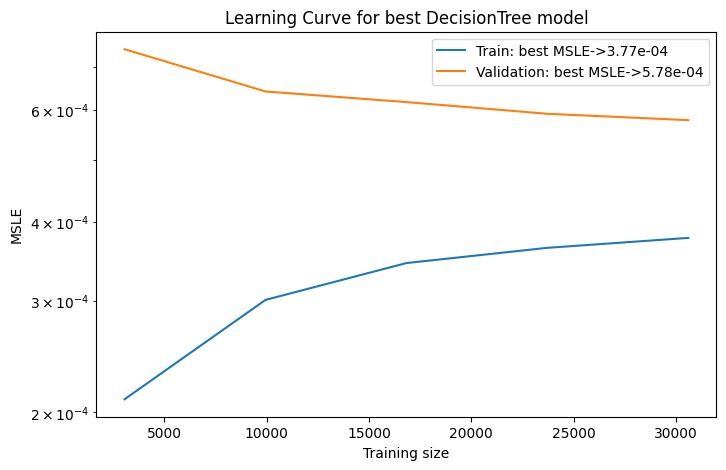




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_dpde_32X.pkl" file !!!


In [48]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_dpde_32X")

#### ->Using rowwise-shuffled data

In [49]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'57.34"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='log2', min_samples_leaf=5,
                      min_samples_split=5)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.0009313711945860229



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.43007121, 0.40678706, 0.38531618, ..., 0.36387988, 0.36128253,
        0.35923349],
       [0.45228813, 0.42602541, 0.40013426, ..., 0.37299941, 0.36964788,
        0.36699701],
       [0.48233235, 0.43878162, 0.40421326, ..., 0.37341553, 0.3698734 ,
        0.36710249],
       ...,
       [0.45228813, 0.42602541, 0.40013426, ..., 0.37299941, 0.36964788,
        0.36699701],
       [0.64155358, 0.55110414, 0.47747716, ..., 0.41277095, 0.4054761 ,
        0.39979851],
       [0.45228813, 0.42602541, 0.40013426, ..., 0.37299941, 0.36964788,
        0.36699701]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00237477 0.00162362 0.00091003 0.00053067 0.00041109 0.00033397
 0.00028038 0.00024111]
Uniform average
0.0008382062937176697
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00519409 0.00339847 0.00182211 0.00103221 0.00079091 0.00063751
 0.00053202 0.00045534]
Uniform average
0.0017328339531795215



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
------------------------------------------------------------------------------------------

array([[0.47792817, 0.44452539, 0.41244527, ..., 0.37973805, 0.37575884,
        0.37262025],
       [0.70728879, 0.59387645, 0.50310744, ..., 0.42544564, 0.41683274,
        0.41015018],
       [0.48426753, 0.45817884, 0.4278214 , ..., 0.39159285, 0.38685233,
        0.38306812],
       ...,
       [0.64462122, 0.54729222, 0.47273616, ..., 0.40956172, 0.40253055,
        0.39706695],
       [0.45228813, 0.42602541, 0.40013426, ..., 0.37299941, 0.36964788,
        0.36699701],
       [0.45388611, 0.42846126, 0.40253943, ..., 0.37473021, 0.37125997,
        0.36851059]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00262711 0.0017896  0.00099682 0.00057901 0.00044794 0.00036358
 0.00030504 0.00026219]
Uniform average
0.000921412449416233
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00578588 0.00376002 0.00199927 0.00112726 0.00086241 0.00069443
 0.00057909 0.00049535]
Uniform average
0.0019129654106181386



>Learning curve


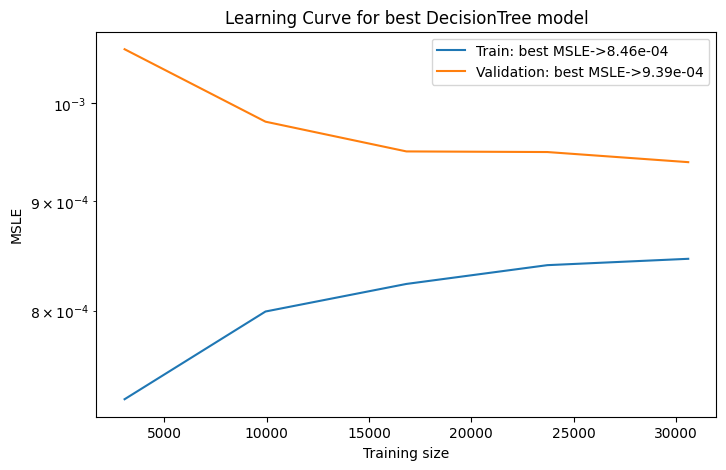




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_dpde_32X_rwsh.pkl" file !!!


In [50]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_dpde_32X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'46.60"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.0035095756351747618



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 416.1386594 ,  634.48063328, 1144.14920892, ..., 3026.69080042,
        3577.7240558 , 4132.17564998],
       [ 278.56142791,  492.89849229, 1001.18091494, ..., 2890.4001612 ,
        3443.7571938 , 4000.51551397],
       [ 260.63037932,  489.74750462, 1024.74633862, ..., 2978.90020975,
        3546.89256586, 4117.26402867],
       ...,
       [ 411.43480912,  650.76647436, 1198.42264238, ..., 3175.03892826,
        3747.48704644, 4321.90093722],
       [ 198.3848321 ,  355.96353959,  760.39496489, ..., 2392.41841926,
        2887.33321987, 3389.64181252],
       [ 298.21690953,  553.68157049, 1130.90520849, ..., 3180.32719377,
        3769.26839371, 4359.03867361]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00584767 0.0015854  0.00152593 0.00199037 0.00205284 0.00203013
 0.00196984 0.00189448]
Uniform average
0.0023620810880067566
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1079.6449881    657.37259841  1692.42960812  6507.75431013
 11117.68739114 16518.3106984  22541.13427577 29070.10245315]
Uniform average
11148.054540401863



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------

array([[ 312.3452947 ,  558.47785058, 1120.23509338, ..., 3134.14876778,
        3715.24224061, 4297.73928697],
       [ 160.62151087,  308.14458805,  695.64355579, ..., 2289.74941138,
        2776.44166693, 3271.16455856],
       [ 506.38510314,  688.96785067, 1126.61322157, ..., 2813.23337407,
        3317.97928378, 3828.95890792],
       ...,
       [ 157.88167914,  300.89299461,  677.47709024, ..., 2238.65840997,
        2717.34141012, 3204.50509992],
       [ 404.90108928,  640.54573868, 1181.95012759, ..., 3143.98226445,
        3713.1913617 , 4284.60096084],
       [ 482.53122509,  706.48904535, 1224.59607003, ..., 3123.92564861,
        3678.37936097, 4235.94128773]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00740748 0.00168616 0.0022507  0.00315404 0.00327229 0.00324
 0.00314329 0.00302125]
Uniform average
0.003396900077119164
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1333.42808502   689.70734506  2446.3219593  10281.34513935
 17713.83917469 26387.16138554 36033.9309825  46470.80923037]
Uniform average
17669.567912728136



>Learning curve


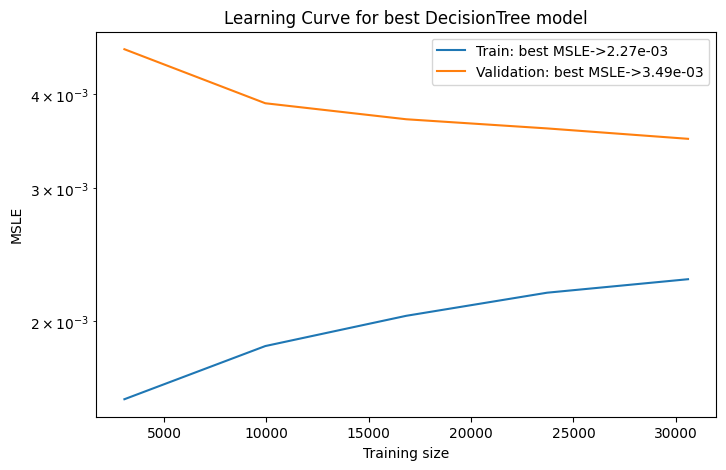




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_enrg_32X.pkl" file !!!


In [51]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_enrg_32X")

#### ->Using rowwise-shuffled data

In [52]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'58.74"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(max_depth=20, max_features='log2', min_samples_leaf=5)
Best parameters:   {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score (msle):   0.007653745937312817



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 449.46200546,  672.60435442, 1189.32671247, ..., 3085.66597731,
        3639.50123843, 4196.50104776],
       [ 275.17618248,  483.27236031,  979.37316011, ..., 2836.47258655,
        3382.34799596, 3932.10155894],
       [ 314.47474153,  546.2234545 , 1083.6903998 , ..., 3040.84320185,
        3609.30606523, 4180.08184839],
       ...,
       [ 462.05796029,  679.39377544, 1184.76386467, ..., 3050.92315082,
        3597.68525546, 4148.05210877],
       [ 163.19901669,  315.7182827 ,  714.00115964, ..., 2337.30130451,
        2830.80347118, 3331.89983184],
       [ 336.62841008,  593.83139448, 1173.578543  , ..., 3228.38198485,
        3818.485856  , 4409.3294865 ]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01159696 0.00366851 0.0026294  0.00296702 0.00297949 0.00290621
 0.00279672 0.0026751 ]
Uniform average
0.004027427274984287
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1978.37891366  1394.3647713   2904.32916824  9746.01277916
 16249.57006579 23843.59169708 32292.88778675 41436.25917496]
Uniform average
16230.674294619337



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
--------------------------------------------------------------

array([[ 307.67891691,  536.31653822, 1066.89321274, ..., 3004.68295823,
        3568.54879398, 4135.00570194],
       [ 164.39929775,  328.42970715,  752.43394325, ..., 2447.20788484,
        2957.54349225, 3474.42421719],
       [ 561.08043783,  745.93681252, 1185.48290081, ..., 2869.71213136,
        3373.11105882, 3882.6678253 ],
       ...,
       [ 150.8037765 ,  293.83067347,  671.58070137, ..., 2238.00785358,
        2718.08769348, 3206.58998099],
       [ 378.46096757,  617.70020729, 1165.02998993, ..., 3139.6157816 ,
        3711.44822188, 4285.25578421],
       [ 490.23784756,  705.03811705, 1205.77368789, ..., 3060.53535651,
        3604.71874053, 4152.68546873]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01549447 0.00513365 0.00612832 0.00721418 0.00714832 0.00688206
 0.00655089 0.0062102 ]
Uniform average
0.0075952610645428475
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 2480.49219249  1741.86083254  6133.97308098 22358.11208856
 37201.78068769 54286.30439105 73119.98262427 93368.16496564]
Uniform average
36336.33385790243



>Learning curve


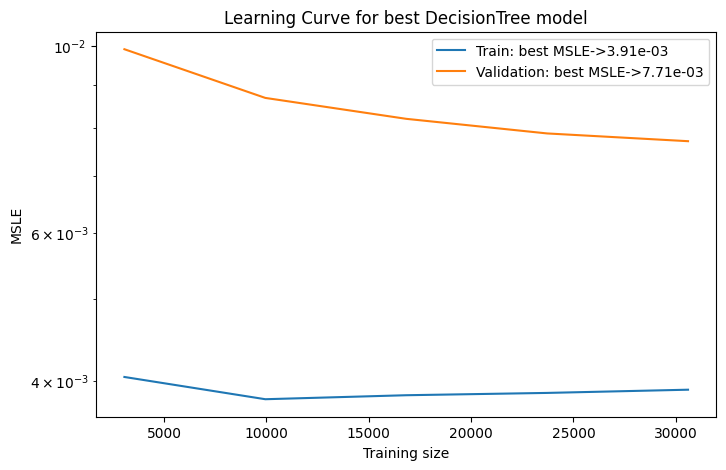




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_enrg_32X_rwsh.pkl" file !!!


In [53]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_enrg_32X_rwsh")

### C. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [54]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'34.52"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=10)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score (msle):   0.00868040745282182



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([487.95      , 325.99303136, 336.47058824, ..., 423.07692308,
       223.43023256, 346.09638554])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00512887]
Uniform average
0.005128865769604189
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[1287.78821171]
Uniform average
1287.7882117134652



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([326.05555556, 216.73529412, 672.8125    , ..., 223.43023256,
       403.15064103, 696.94117647])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00870676]
Uniform average
0.008706760435196498
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[2273.11530844]
Uniform average
2273.1153084388725



>Learning curve


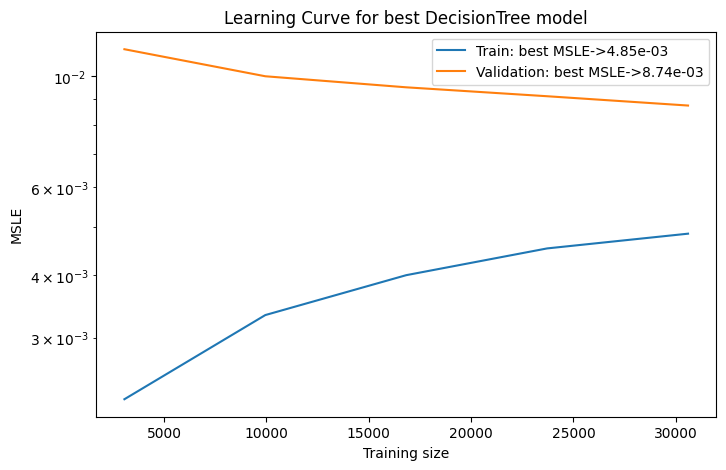




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_PcMmax_32X.pkl" file !!!


In [55]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_PcMmax_32X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'max_depth': [None, 5, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=18,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 0.0'36.96"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=5, min_samples_split=5)
Best parameters:   {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score (msle):   0.017295017917541462



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([519.05699482, 369.40909091, 386.19248826, ..., 516.97058824,
       219.31818182, 341.95238095])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01174679]
Uniform average
0.011746789694988892
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[3126.42281505]
Uniform average
3126.4228150526546



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([388.71538462, 207.04347826, 679.78378378, ..., 198.57142857,
       457.22089552, 618.76666667])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01673256]
Uniform average
0.016732564583465514
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[4018.57869202]
Uniform average
4018.578692024363



>Learning curve


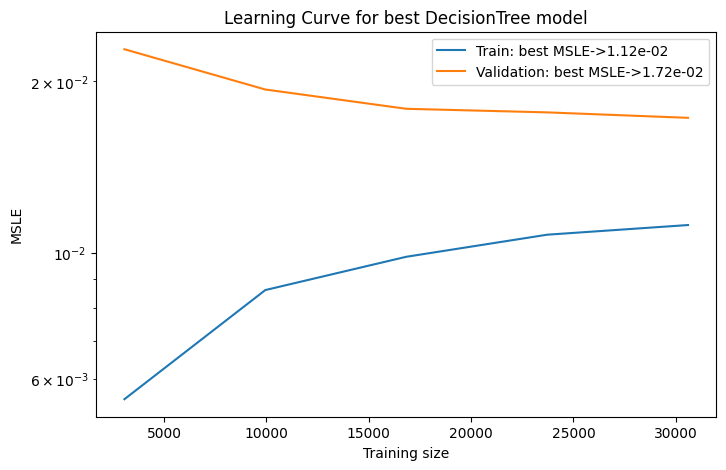




>Saving the grid search info:
The grid search info is saved in the "QS_dtree_grid_PcMmax_32X_rwsh.pkl" file !!!


In [56]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("dtree",5,dtree_grid,"msle",cores_par=18,filesave="QS_dtree_grid_PcMmax_32X_rwsh")